In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

sns.set_style("whitegrid")
sns.set_palette("bright")

In [2]:
US_Var_data = pd.read_csv("AMF_US-Var_BASE_HH_9-1.csv", comment = "#")
US_Ton_data = pd.read_csv("AMF_US-Ton_BASE_HH_9-1.csv", comment = "#")

In [3]:
# Get rid of the missing values for now
US_Var_nan = US_Var_data.replace("-9999", np.nan)
US_Ton_nan = US_Ton_data.replace("-9999", np.nan)

## Plotting correlation matrix 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

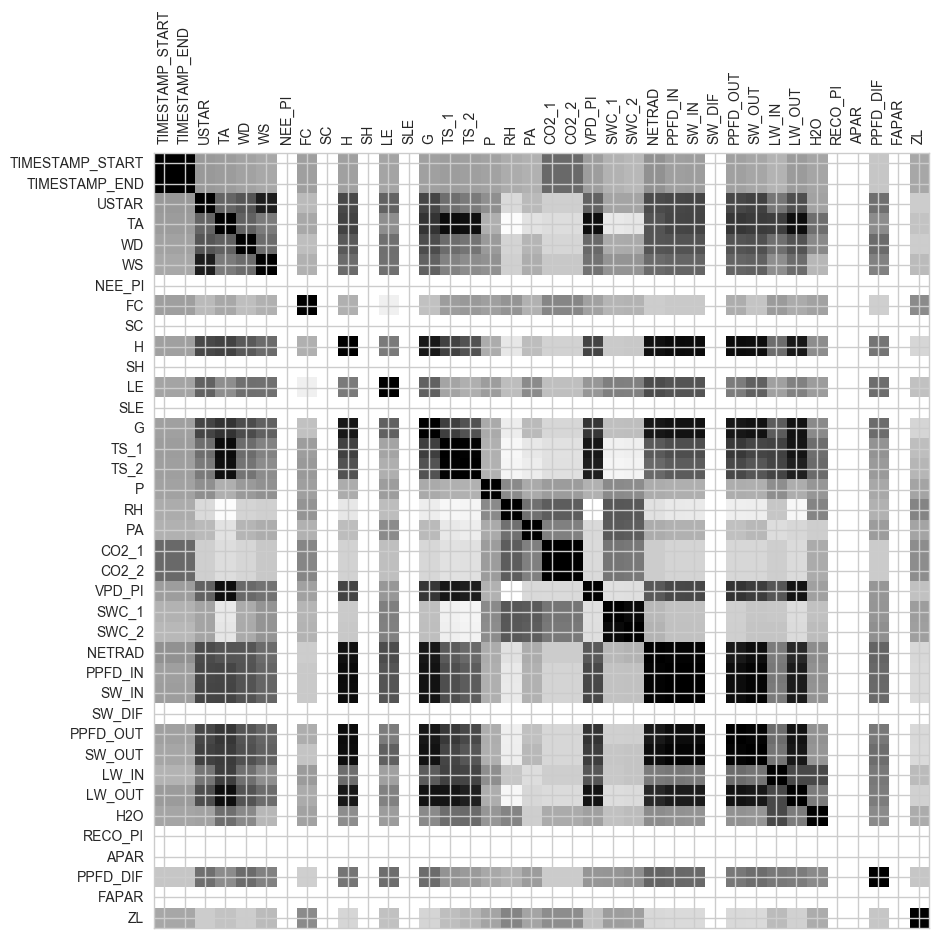

In [4]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(US_Var_nan)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

## Exploring variables with high correlation in the US_TON dataset


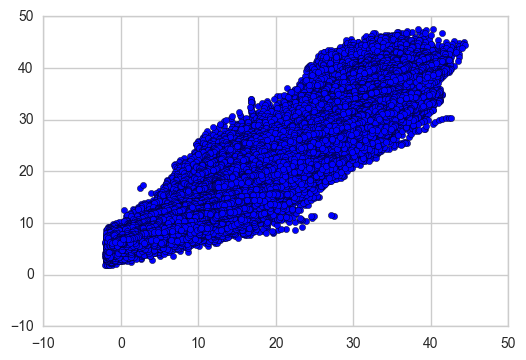

In [5]:
plt.scatter(US_Var_nan["TA"], US_Var_nan["TS_2"])

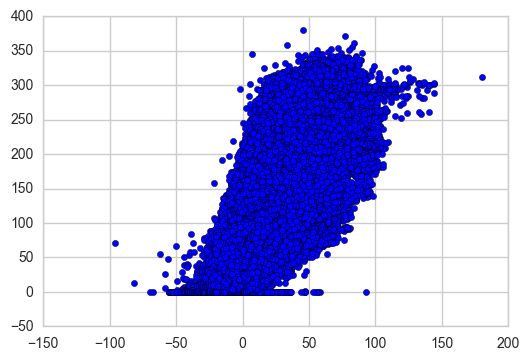

In [6]:
plt.scatter(US_Var_nan["G"], US_Var_nan["PPFD_OUT"])

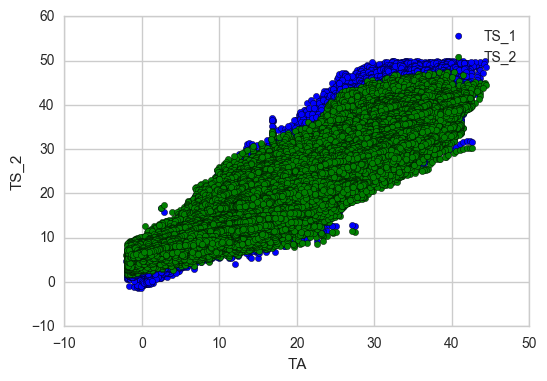

In [7]:
TA_TS_1 = US_Var_nan.plot.scatter(x='TA', y='TS_1', color='b', label='TS_1');

US_Var_nan.plot.scatter(x='TA', y='TS_2', color='g', label='TS_2', ax=TA_TS_1)

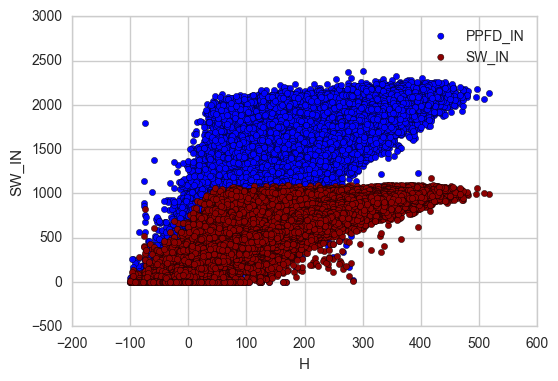

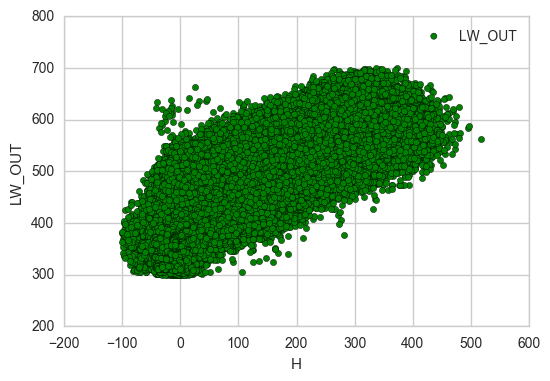

In [8]:
H_PPFD = US_Var_nan.plot.scatter(x='H', y='PPFD_IN', color='b', label='PPFD_IN');
LW_OUT = US_Var_nan.plot.scatter(x='H', y='LW_OUT', color='g', label='LW_OUT');
US_Var_nan.plot.scatter(x='H', y='SW_IN', color='DarkRed', label='SW_IN', ax= H_PPFD)

## KDE plots

            TA  PPFD_OUT
185921  19.519    219.23
23467   12.720      0.00
82231   19.403      0.00
72576    9.320      0.00
40534   17.370     95.80


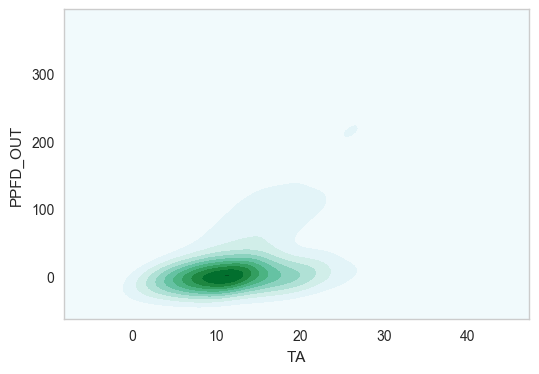

In [9]:
x_col, y_col = "TA", "PPFD_OUT"
non_null = US_Var_nan[~(US_Var_nan[x_col].isnull() | US_Var_nan[y_col].isnull())][[x_col, y_col]].sample(n=5000)
print non_null.head()
x = non_null[x_col]
y = non_null[y_col]
sns.kdeplot(x, y, shade=True)

            TA  VPD_PI
202639  32.998   3.807
80509   18.329   0.809
246970   0.649   0.176
253654  31.866   3.908
274155  30.178   2.916


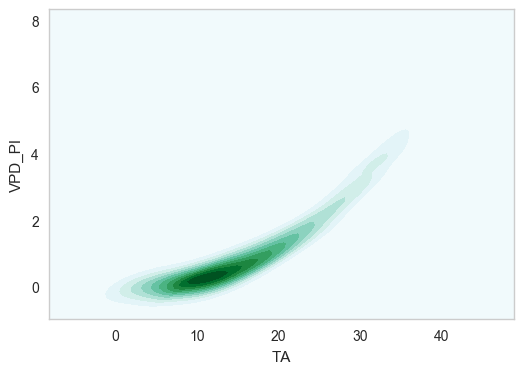

In [10]:
x_col, y_col = "TA", "VPD_PI"
non_null = US_Var_nan[~(US_Var_nan[x_col].isnull() | US_Var_nan[y_col].isnull())][[x_col, y_col]].sample(n=5000)
print non_null.head()
x = non_null[x_col]
y = non_null[y_col]
sns.kdeplot(x, y, shade=True)

## Exploring US_Ton Dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

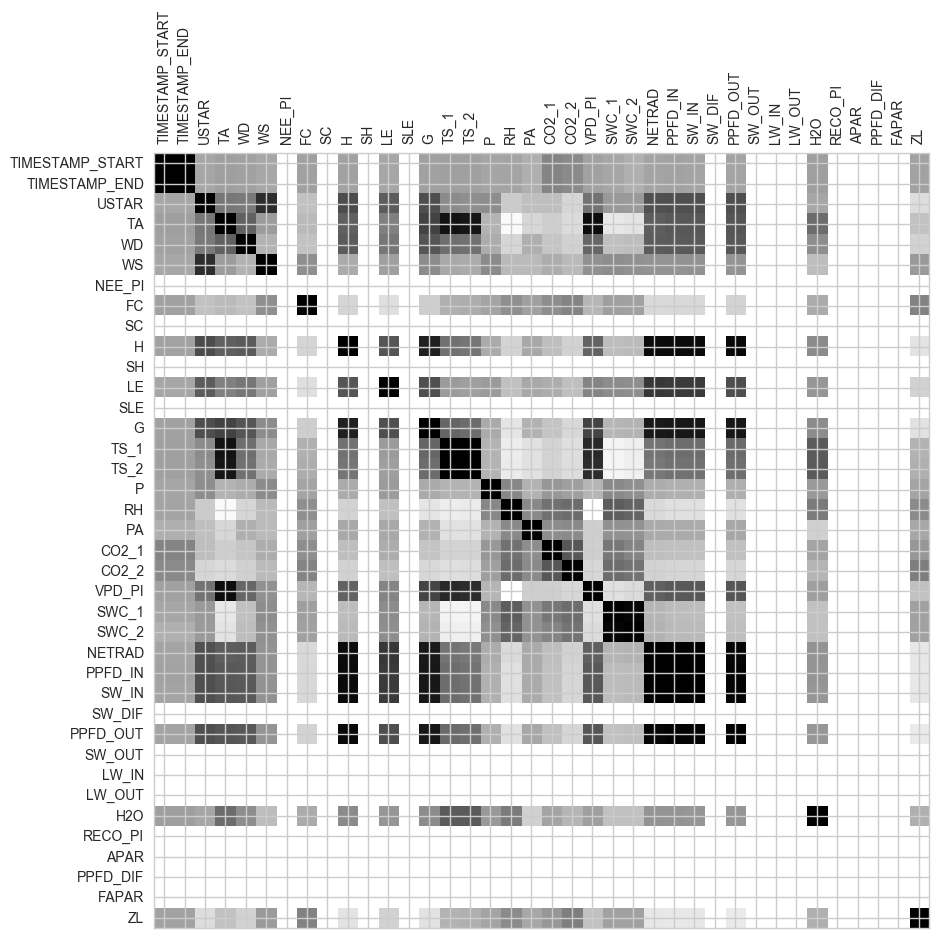

In [11]:
plot_corr(US_Ton_nan)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

- Much less data in this dataset
- Less variables with strong correlation due to missing data

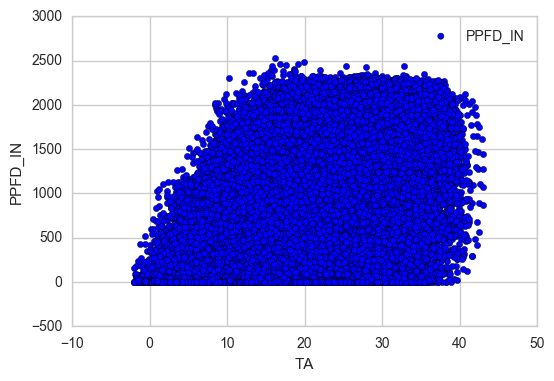

In [15]:
US_Ton_nan.plot.scatter(x='TA', y='PPFD_IN', color='b', label='PPFD_IN')



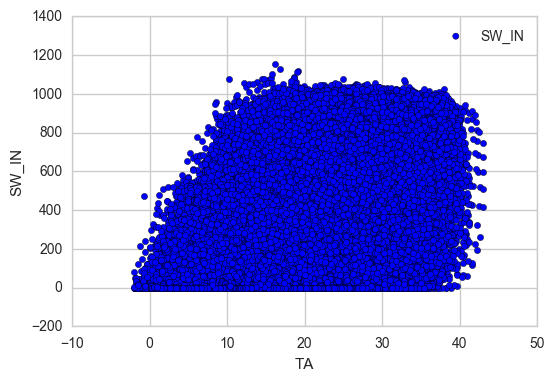

In [16]:
US_Ton_nan.plot.scatter(x='TA', y='SW_IN', color='b', label='SW_IN');



- SW_IN and PPFD_IN basically have the same distribution, but just different ranges. 

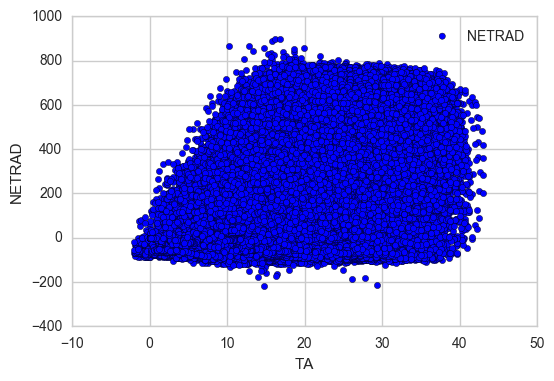

In [18]:
US_Ton_nan.plot.scatter(x='TA', y='NETRAD', color='b', label='NETRAD')


